In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import optimizers


In [2]:
def make_dataset(data, window_size):
    dataset = []
    for i in range(len(data) - window_size):
        dataset.append(np.array(data.iloc[i:i+window_size+1]))
    return np.array(dataset)

In [39]:
def error_rate(label, prediction, ft_len, forecast_len):
    error_avg = 0
    ft_len = ft_len-1
    for i in range(forecast_len):
        error = abs((label[ft_len+i,0,0] - prediction[ft_len+i])/label[ft_len+i,0,0] * 100)
        print('num',i,error,'actual',label[ft_len+i,0,0],'prediction',prediction[ft_len+i])
        error_avg = error_avg + error
    error_avg = error_avg/forecast_len
    return error_avg

In [4]:
forecasting = 20
window_size = 19

In [5]:
df = pd.read_csv('trainset/J0003_0024_0222_20110307012737_cell_1.csv', encoding='utf8')
df

,MeasuredDate,CellNo,Resistance,Volt,Temp
0,2011.3.7 6:27,1,0.259,2.23,-20
1,2011.3.7 18:29,1,0.260,2.23,-20
2,2011.3.8 6:29,1,0.259,2.23,-20
3,2011.3.8 18:29,1,0.259,2.23,-20
4,2011.3.9 6:29,1,0.259,2.23,-20
...,...,...,...,...,...
254,2011.8.30 5:28,1,0.301,2.23,-20
255,2011.8.30 17:28,1,0.301,2.23,-20
256,2011.8.31 5:28,1,0.302,2.23,-20
257,2011.8.31 16:09,1,0.300,2.23,-20


In [6]:
df = df.loc[:,['Resistance']]
df

,Resistance
0,0.259
1,0.260
2,0.259
3,0.259
4,0.259
...,...
254,0.301
255,0.301
256,0.302
257,0.300


<AxesSubplot:>

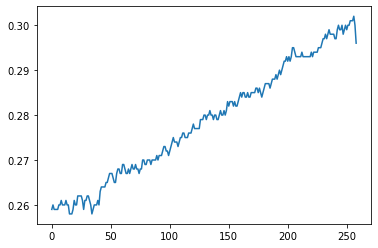

In [7]:
df['Resistance'].plot()

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scale_cols = ['Resistance']
df_scaled = scaler.fit_transform(df)

#df_scaled = pd.DataFrame(df_scaled)
#df_scaled.columns = scale_cols

df_scaled

array([[0.02272727],
       [0.04545455],
       [0.02272727],
       [0.02272727],
       [0.02272727],
       [0.02272727],
       [0.04545455],
       [0.04545455],
       [0.06818182],
       [0.04545455],
       [0.04545455],
       [0.04545455],
       [0.06818182],
       [0.04545455],
       [0.04545455],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.02272727],
       [0.06818182],
       [0.04545455],
       [0.04545455],
       [0.09090909],
       [0.09090909],
       [0.09090909],
       [0.09090909],
       [0.06818182],
       [0.02272727],
       [0.06818182],
       [0.06818182],
       [0.09090909],
       [0.09090909],
       [0.06818182],
       [0.04545455],
       [0.        ],
       [0.02272727],
       [0.04545455],
       [0.04545455],
       [0.04545455],
       [0.06818182],
       [0.04545455],
       [0.11363636],
       [0.13636364],
       [0.13636364],
       [0.13636364],
       [0.13636364],
       [0.15909091],
       [0.159

In [9]:
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = ['Resistance']

In [10]:
df_scaled

,Resistance
0,0.022727
1,0.045455
2,0.022727
3,0.022727
4,0.022727
...,...
254,0.977273
255,0.977273
256,1.000000
257,0.954545


In [11]:
df_scaled_train = df_scaled.loc[:200,]
df_scaled_test = df_scaled.loc[200:,]

df_scaled_train

,Resistance
0,0.022727
1,0.045455
2,0.022727
3,0.022727
4,0.022727
...,...
196,0.750000
197,0.772727
198,0.772727
199,0.795455


In [12]:
ds_train = make_dataset(df_scaled_train,window_size)
ds_train

array([[[0.02272727],
        [0.04545455],
        [0.02272727],
        ...,
        [0.        ],
        [0.02272727],
        [0.06818182]],

       [[0.04545455],
        [0.02272727],
        [0.02272727],
        ...,
        [0.02272727],
        [0.06818182],
        [0.04545455]],

       [[0.02272727],
        [0.02272727],
        [0.02272727],
        ...,
        [0.06818182],
        [0.04545455],
        [0.04545455]],

       ...,

       [[0.61363636],
        [0.63636364],
        [0.65909091],
        ...,
        [0.75      ],
        [0.77272727],
        [0.77272727]],

       [[0.63636364],
        [0.65909091],
        [0.65909091],
        ...,
        [0.77272727],
        [0.77272727],
        [0.79545455]],

       [[0.65909091],
        [0.65909091],
        [0.65909091],
        ...,
        [0.77272727],
        [0.79545455],
        [0.77272727]]])

In [13]:
ds_test = make_dataset(df_scaled_test,window_size)
ds_test

array([[[0.77272727],
        [0.79545455],
        [0.77272727],
        [0.79545455],
        [0.84090909],
        [0.84090909],
        [0.81818182],
        [0.79545455],
        [0.79545455],
        [0.79545455],
        [0.79545455],
        [0.79545455],
        [0.81818182],
        [0.79545455],
        [0.79545455],
        [0.79545455],
        [0.79545455],
        [0.79545455],
        [0.79545455],
        [0.79545455]],

       [[0.79545455],
        [0.77272727],
        [0.79545455],
        [0.84090909],
        [0.84090909],
        [0.81818182],
        [0.79545455],
        [0.79545455],
        [0.79545455],
        [0.79545455],
        [0.79545455],
        [0.81818182],
        [0.79545455],
        [0.79545455],
        [0.79545455],
        [0.79545455],
        [0.79545455],
        [0.79545455],
        [0.79545455],
        [0.81818182]],

       [[0.77272727],
        [0.79545455],
        [0.84090909],
        [0.84090909],
        [0.81818182],
      

In [14]:
x_train = ds_train[:, :window_size,:]
x_train

array([[[0.02272727],
        [0.04545455],
        [0.02272727],
        ...,
        [0.        ],
        [0.        ],
        [0.02272727]],

       [[0.04545455],
        [0.02272727],
        [0.02272727],
        ...,
        [0.        ],
        [0.02272727],
        [0.06818182]],

       [[0.02272727],
        [0.02272727],
        [0.02272727],
        ...,
        [0.02272727],
        [0.06818182],
        [0.04545455]],

       ...,

       [[0.61363636],
        [0.63636364],
        [0.65909091],
        ...,
        [0.72727273],
        [0.75      ],
        [0.77272727]],

       [[0.63636364],
        [0.65909091],
        [0.65909091],
        ...,
        [0.75      ],
        [0.77272727],
        [0.77272727]],

       [[0.65909091],
        [0.65909091],
        [0.65909091],
        ...,
        [0.77272727],
        [0.77272727],
        [0.79545455]]])

In [15]:
y_train = ds_train[:, window_size, :]
y_train

array([[0.06818182],
       [0.04545455],
       [0.04545455],
       [0.09090909],
       [0.09090909],
       [0.09090909],
       [0.09090909],
       [0.06818182],
       [0.02272727],
       [0.06818182],
       [0.06818182],
       [0.09090909],
       [0.09090909],
       [0.06818182],
       [0.04545455],
       [0.        ],
       [0.02272727],
       [0.04545455],
       [0.04545455],
       [0.04545455],
       [0.06818182],
       [0.04545455],
       [0.11363636],
       [0.13636364],
       [0.13636364],
       [0.13636364],
       [0.13636364],
       [0.15909091],
       [0.15909091],
       [0.18181818],
       [0.20454545],
       [0.20454545],
       [0.20454545],
       [0.18181818],
       [0.15909091],
       [0.15909091],
       [0.20454545],
       [0.22727273],
       [0.22727273],
       [0.20454545],
       [0.20454545],
       [0.25      ],
       [0.25      ],
       [0.22727273],
       [0.20454545],
       [0.20454545],
       [0.22727273],
       [0.204

In [16]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128, 
               activation='relu', 
               return_sequences=False)
          )
model.add(tf.keras.layers.Dense(64))
model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.Dense(1))

In [17]:
model.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(lr=0.001), metrics=[tf.metrics.MeanAbsoluteError()])
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
filename = os.path.join('models/', '210625_checkpoint.h5')
checkpoint = tf.keras.callbacks.ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

In [18]:
h = model.fit(x_train, y_train, 
                    epochs=100, 
                    batch_size=1)

Epoch 1/100
182/182 [==============================] - 2s 3ms/step - loss: 0.0139 - mean_absolute_error: 0.0774
Epoch 2/100
182/182 [==============================] - 1s 3ms/step - loss: 7.3140e-04 - mean_absolute_error: 0.0210
Epoch 3/100
182/182 [==============================] - 1s 3ms/step - loss: 9.5331e-04 - mean_absolute_error: 0.0246
Epoch 4/100
182/182 [==============================] - 1s 3ms/step - loss: 0.0014 - mean_absolute_error: 0.0309
Epoch 5/100
182/182 [==============================] - 1s 3ms/step - loss: 0.0013 - mean_absolute_error: 0.0288
Epoch 6/100
182/182 [==============================] - 1s 3ms/step - loss: 7.4924e-04 - mean_absolute_error: 0.0203
Epoch 7/100
182/182 [==============================] - 1s 3ms/step - loss: 0.0011 - mean_absolute_error: 0.0272
Epoch 8/100
182/182 [==============================] - 1s 3ms/step - loss: 0.0010 - mean_absolute_error: 0.0251
Epoch 9/100
182/182 [==============================] - 1s 3ms/step - loss: 8.3874e-04 - mean

182/182 [==============================] - 1s 3ms/step - loss: 5.0529e-04 - mean_absolute_error: 0.0185
Epoch 70/100
182/182 [==============================] - 1s 3ms/step - loss: 6.0251e-04 - mean_absolute_error: 0.0196
Epoch 71/100
182/182 [==============================] - 1s 3ms/step - loss: 6.9474e-04 - mean_absolute_error: 0.0226
Epoch 72/100
182/182 [==============================] - 1s 4ms/step - loss: 6.6011e-04 - mean_absolute_error: 0.0201
Epoch 73/100
182/182 [==============================] - 1s 3ms/step - loss: 4.8917e-04 - mean_absolute_error: 0.0177
Epoch 74/100
182/182 [==============================] - 1s 3ms/step - loss: 5.8218e-04 - mean_absolute_error: 0.0188
Epoch 75/100
182/182 [==============================] - 1s 4ms/step - loss: 5.0993e-04 - mean_absolute_error: 0.0186
Epoch 76/100
182/182 [==============================] - 1s 3ms/step - loss: 4.7279e-04 - mean_absolute_error: 0.0175
Epoch 77/100
182/182 [==============================] - 1s 3ms/step - loss: 5

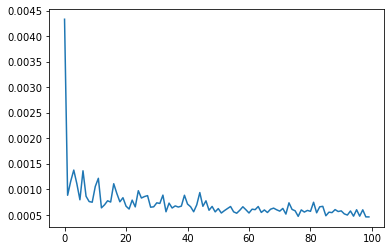

In [19]:
plt.plot(h.history['loss'])
plt.show()

In [61]:
pred_count = 20

In [62]:
x_test = ds_test[:,:window_size,:]
y_test = ds_test[:, window_size,:]

seq_in = x_test[0,:,:]
seq_in = seq_in.tolist()
seq_out = x_test[0,:,:].tolist()


for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1,window_size,1))
    pred_out = model.predict(sample_in)
    seq_out.append(pred_out[0].tolist())
    seq_in.append(pred_out[0].tolist())
    seq_in.pop(0)


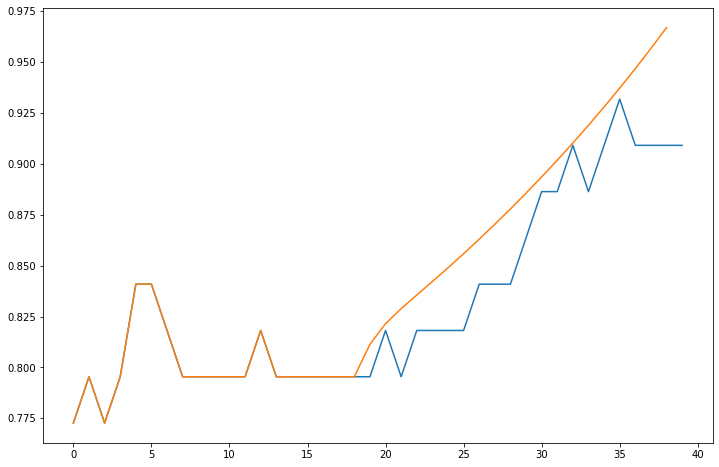

In [63]:
plt.figure(figsize=(12,8))
plt.plot(x_test[:,0,:])
plt.plot(seq_out)
plt.show()

In [64]:
error1 = error_rate(x_test, seq_out, 20, 20)
print(error1)

num 0 [2.00197833] actual 0.7954545454545459 prediction [0.8113793730735779]
num 1 [0.40814943] actual 0.8181818181818183 prediction [0.8215212225914001]
num 2 [4.20513834] actual 0.7954545454545459 prediction [0.8289045095443726]
num 3 [2.1263414] actual 0.8181818181818183 prediction [0.8355791568756104]
num 4 [2.93725067] actual 0.8181818181818183 prediction [0.8422138690948486]
num 5 [3.7613531] actual 0.8181818181818183 prediction [0.8489565253257751]
num 6 [4.60698273] actual 0.8181818181818183 prediction [0.8558753132820129]
num 7 [2.6265067] actual 0.8409090909090908 prediction [0.8629956245422363]
num 8 [3.49821787] actual 0.8409090909090908 prediction [0.8703259229660034]
num 9 [4.39501389] actual 0.8409090909090908 prediction [0.8778671622276306]
num 10 [2.5448109] actual 0.8636363636363642 prediction [0.885614275932312]
num 11 [0.81480833] actual 0.8863636363636367 prediction [0.8935858011245728]
num 12 [1.74012368] actual 0.8863636363636367 prediction [0.9017874598503113]
n

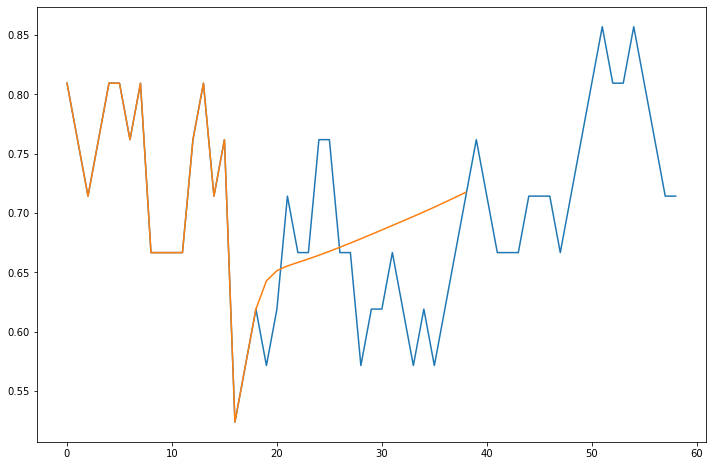

num 0 [12.49314547] actual 0.5714285714285712 prediction [0.6428179740905762]
num 1 [5.23148317] actual 0.6190476190476186 prediction [0.651432991027832]
num 2 [8.24285984] actual 0.7142857142857135 prediction [0.6554081439971924]
num 3 [1.24365687] actual 0.6666666666666661 prediction [0.65837562084198]
num 4 [0.80187023] actual 0.6666666666666661 prediction [0.6613208651542664]
num 5 [12.79168203] actual 0.7619047619047628 prediction [0.6644443273544312]
num 6 [12.35836782] actual 0.7619047619047628 prediction [0.6677457690238953]
num 7 [0.67541003] actual 0.6666666666666661 prediction [0.6711694002151489]
num 8 [1.20277703] actual 0.6666666666666661 prediction [0.6746851801872253]
num 9 [18.70607138] actual 0.5714285714285712 prediction [0.6783204078674316]
num 10 [10.17291546] actual 0.6190476190476186 prediction [0.6820228099822998]
num 11 [10.77792828] actual 0.6190476190476186 prediction [0.6857681274414062]
num 12 [3.43210399] actual 0.6666666666666661 prediction [0.68954735994

In [71]:
test_df = pd.read_csv('testset/J0003_0024_0221_20110307012732_cell_03.csv', encoding='utf8')

x_test2 = test_df['Resistance']

x_test2 = pd.DataFrame(x_test2)
x_test2.columns = scale_cols
x_test2 = scaler.fit_transform(x_test2)
x_test2 = pd.DataFrame(x_test2)

ds_test2 = make_dataset(x_test2, window_size)


x_test = ds_test2[:,:window_size,:]
y_test = ds_test2[:, window_size,:]

seq_in = x_test[180,:,:]
seq_in = seq_in.tolist()
seq_out = x_test[180,:,:].tolist()


for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1,window_size,1))
    pred_out = model.predict(sample_in)
    seq_out.append(pred_out[0].tolist())
    seq_in.append(pred_out[0].tolist())
    seq_in.pop(0)


plt.figure(figsize=(12,8))
plt.plot(x_test[180:,0,:])
plt.plot(seq_out)
plt.show()

error1 = error_rate(x_test[180:], seq_out, 20, 20)
print(error1)

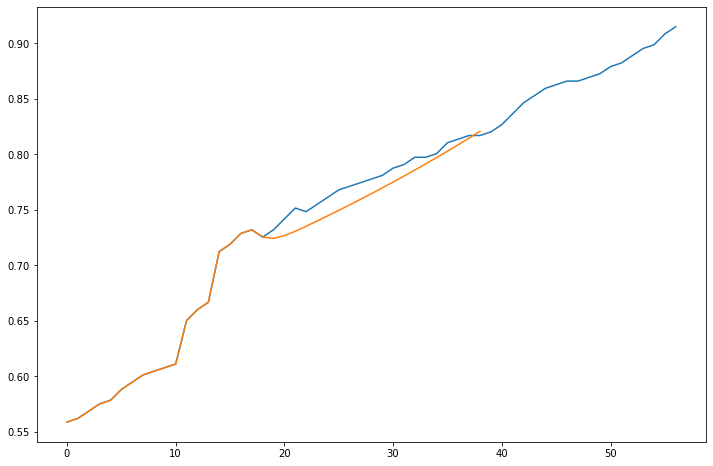

num 0 [1.06027935] actual 0.7320261437908495 prediction [0.7242646217346191]
num 1 [2.02922564] actual 0.7418300653594769 prediction [0.726776659488678]
num 2 [2.78453355] actual 0.7516339869281043 prediction [0.7307044863700867]
num 3 [1.75716044] actual 0.7483660130718952 prediction [0.7352160215377808]
num 4 [1.98398906] actual 0.7549019607843137 prediction [0.7399247884750366]
num 5 [2.19606632] actual 0.761437908496732 prediction [0.744716227054596]
num 6 [2.39631455] actual 0.7679738562091503 prediction [0.7495707869529724]
num 7 [2.17180197] actual 0.7712418300653594 prediction [0.7544919848442078]
num 8 [1.93907943] actual 0.7745098039215685 prediction [0.7594914436340332]
num 9 [1.69602036] actual 0.7777777777777777 prediction [0.7645865082740784]
num 10 [1.44328872] actual 0.7810457516339868 prediction [0.769773006439209]
num 11 [1.59105028] actual 0.7875816993464051 prediction [0.7750508785247803]
num 12 [1.31929768] actual 0.7908496732026142 prediction [0.7804160118103027]


In [72]:
test_df = pd.read_csv('testset/J0003_0024_0221_20110307012732_cell_06.csv', encoding='utf8')

x_test2 = test_df['Resistance']

x_test2 = pd.DataFrame(x_test2)
x_test2.columns = scale_cols
x_test2 = scaler.fit_transform(x_test2)
x_test2 = pd.DataFrame(x_test2)

ds_test2 = make_dataset(x_test2, window_size)


x_test = ds_test2[:,:window_size,:]
y_test = ds_test2[:, window_size,:]

seq_in = x_test[180,:,:]
seq_in = seq_in.tolist()
seq_out = x_test[180,:,:].tolist()


for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1,window_size,1))
    pred_out = model.predict(sample_in)
    seq_out.append(pred_out[0].tolist())
    seq_in.append(pred_out[0].tolist())
    seq_in.pop(0)


plt.figure(figsize=(12,8))
plt.plot(x_test[180:,0,:])
plt.plot(seq_out)
plt.show()

error1 = error_rate(x_test[180:], seq_out, 20, 20)
print(error1)

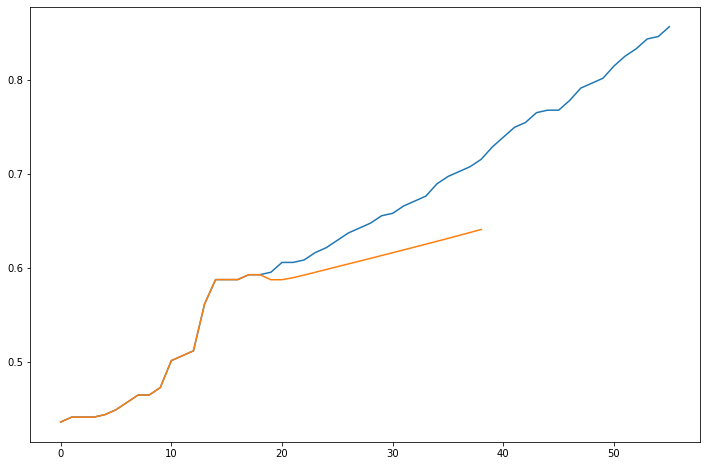

num 0 [1.33646376] actual 0.5953002610966058 prediction [0.5873442888259888]
num 1 [3.03320014] actual 0.6057441253263709 prediction [0.5873706936836243]
num 2 [2.68306681] actual 0.6057441253263709 prediction [0.589491605758667]
num 3 [2.64215595] actual 0.608355091383812 prediction [0.5922814011573792]
num 4 [3.39853695] actual 0.616187989556136 prediction [0.5952466130256653]
num 5 [3.7304438] actual 0.6214099216710185 prediction [0.5982285737991333]
num 6 [4.45771771] actual 0.6292428198433422 prediction [0.6011929512023926]
num 7 [5.16871707] actual 0.6370757180156659 prediction [0.6041470766067505]
num 8 [5.47953093] actual 0.6422976501305484 prediction [0.6071027517318726]
num 9 [5.78307642] actual 0.6475195822454309 prediction [0.6100730299949646]
num 10 [6.45313104] actual 0.6553524804177544 prediction [0.6130617260932922]
num 11 [6.36869215] actual 0.6579634464751958 prediction [0.6160597801208496]
num 12 [7.01722842] actual 0.6657963446475195 prediction [0.6190758943557739]


In [73]:
test_df = pd.read_csv('testset/J0003_0024_0221_20110307012732_cell_7.csv', encoding='utf8')

x_test2 = test_df['Resistance']

x_test2 = pd.DataFrame(x_test2)
x_test2.columns = scale_cols
x_test2 = scaler.fit_transform(x_test2)
x_test2 = pd.DataFrame(x_test2)

ds_test2 = make_dataset(x_test2, window_size)


x_test = ds_test2[:,:window_size,:]
y_test = ds_test2[:, window_size,:]

seq_in = x_test[180,:,:]
seq_in = seq_in.tolist()
seq_out = x_test[180,:,:].tolist()


for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1,window_size,1))
    pred_out = model.predict(sample_in)
    seq_out.append(pred_out[0].tolist())
    seq_in.append(pred_out[0].tolist())
    seq_in.pop(0)


plt.figure(figsize=(12,8))
plt.plot(x_test[180:,0,:])
plt.plot(seq_out)
plt.show()

error1 = error_rate(x_test[180:], seq_out, 20, 20)
print(error1)

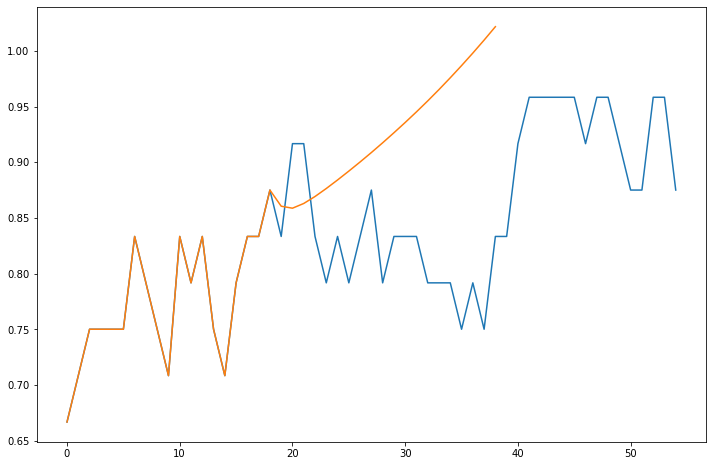

num 0 [3.25958967] actual 0.8333333333333339 prediction [0.8604965806007385]
num 1 [6.32337874] actual 0.9166666666666661 prediction [0.8587023615837097]
num 2 [5.86038069] actual 0.9166666666666661 prediction [0.8629465103149414]
num 3 [4.30477142] actual 0.8333333333333339 prediction [0.869206428527832]
num 4 [10.70254727] actual 0.7916666666666661 prediction [0.8763951659202576]
num 5 [6.08665228] actual 0.8333333333333339 prediction [0.8840554356575012]
num 6 [12.67715002] actual 0.7916666666666661 prediction [0.8920274376869202]
num 7 [8.02777052] actual 0.8333333333333339 prediction [0.9002314209938049]
num 8 [3.85095733] actual 0.875 prediction [0.9086958765983582]
num 9 [15.88696932] actual 0.7916666666666661 prediction [0.9174385070800781]
num 10 [11.17420912] actual 0.8333333333333339 prediction [0.9264517426490784]
num 11 [12.28393555] actual 0.8333333333333339 prediction [0.935699462890625]
num 12 [13.42764378] actual 0.8333333333333339 prediction [0.9452303647994995]
num 1

In [74]:
test_df = pd.read_csv('testset/J0003_0024_0221_20110307012732_cell_9.csv', encoding='utf8')

x_test2 = test_df['Resistance']

x_test2 = pd.DataFrame(x_test2)
x_test2.columns = scale_cols
x_test2 = scaler.fit_transform(x_test2)
x_test2 = pd.DataFrame(x_test2)

ds_test2 = make_dataset(x_test2, window_size)


x_test = ds_test2[:,:window_size,:]
y_test = ds_test2[:, window_size,:]

seq_in = x_test[180,:,:]
seq_in = seq_in.tolist()
seq_out = x_test[180,:,:].tolist()


for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1,window_size,1))
    pred_out = model.predict(sample_in)
    seq_out.append(pred_out[0].tolist())
    seq_in.append(pred_out[0].tolist())
    seq_in.pop(0)


plt.figure(figsize=(12,8))
plt.plot(x_test[180:,0,:])
plt.plot(seq_out)
plt.show()

error1 = error_rate(x_test[180:], seq_out, 20, 20)
print(error1)

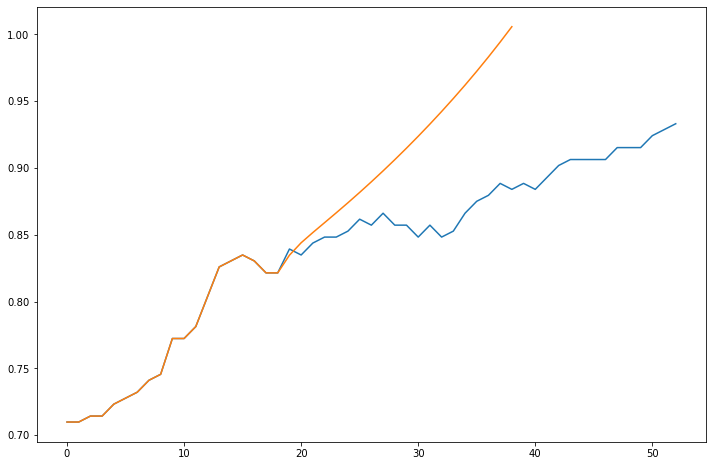

num 0 [0.55159711] actual 0.839285714285714 prediction [0.8346562385559082]
num 1 [1.09521488] actual 0.8348214285714284 prediction [0.8439645171165466]
num 2 [0.93198706] actual 0.84375 prediction [0.8516136407852173]
num 3 [1.26995187] actual 0.8482142857142856 prediction [0.8589861989021301]
num 4 [2.14215931] actual 0.8482142857142856 prediction [0.8663843870162964]
num 5 [2.49145867] actual 0.8526785714285712 prediction [0.8739227056503296]
num 6 [2.32700289] actual 0.8616071428571428 prediction [0.8816567659378052]
num 7 [3.78612181] actual 0.8571428571428568 prediction [0.8895953297615051]
num 8 [3.65800268] actual 0.8660714285714284 prediction [0.8977523446083069]
num 9 [5.71615597] actual 0.8571428571428568 prediction [0.9061384797096252]
num 10 [6.72196448] actual 0.8571428571428568 prediction [0.9147596955299377]
num 11 [8.89151623] actual 0.8482142857142856 prediction [0.9236333966255188]
num 12 [8.82407228] actual 0.8571428571428568 prediction [0.9327777624130249]
num 13 [

In [75]:
test_df = pd.read_csv('testset/J0003_0024_0221_20110307012732_cell_18.csv', encoding='utf8')

x_test2 = test_df['Resistance']

x_test2 = pd.DataFrame(x_test2)
x_test2.columns = scale_cols
x_test2 = scaler.fit_transform(x_test2)
x_test2 = pd.DataFrame(x_test2)

ds_test2 = make_dataset(x_test2, window_size)


x_test = ds_test2[:,:window_size,:]
y_test = ds_test2[:, window_size,:]

seq_in = x_test[180,:,:]
seq_in = seq_in.tolist()
seq_out = x_test[180,:,:].tolist()


for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1,window_size,1))
    pred_out = model.predict(sample_in)
    seq_out.append(pred_out[0].tolist())
    seq_in.append(pred_out[0].tolist())
    seq_in.pop(0)


plt.figure(figsize=(12,8))
plt.plot(x_test[180:,0,:])
plt.plot(seq_out)
plt.show()

error1 = error_rate(x_test[180:], seq_out, 20, 20)
print(error1)

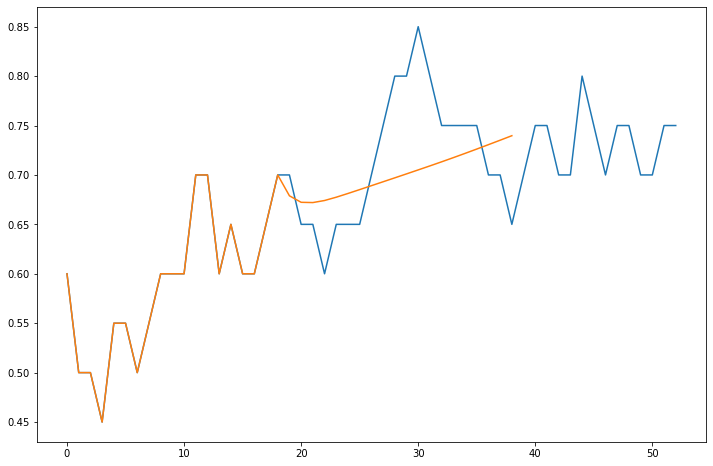

num 0 [3.0166098] actual 0.7000000000000011 prediction [0.6788837313652039]
num 1 [3.4333981] actual 0.6500000000000004 prediction [0.6723170876502991]
num 2 [3.39184908] actual 0.6500000000000004 prediction [0.6720470190048218]
num 3 [12.35578855] actual 0.6000000000000014 prediction [0.6741347312927246]
num 4 [4.22724027] actual 0.6500000000000004 prediction [0.6774770617485046]
num 5 [4.80805544] actual 0.6500000000000004 prediction [0.6812523603439331]
num 6 [5.41023658] actual 0.6500000000000004 prediction [0.6851665377616882]
num 7 [1.55323914] actual 0.7000000000000011 prediction [0.6891273260116577]
num 8 [7.58817991] actual 0.75 prediction [0.6930886507034302]
num 9 [12.86736727] actual 0.8000000000000007 prediction [0.6970610618591309]
num 10 [12.36755997] actual 0.8000000000000007 prediction [0.7010595202445984]
num 11 [17.04797745] actual 0.8500000000000014 prediction [0.705092191696167]
num 12 [11.35673225] actual 0.8000000000000007 prediction [0.7091461420059204]
num 13 [

In [76]:
test_df = pd.read_csv('testset/J0003_0024_0221_20110307012732_cell_19.csv', encoding='utf8')

x_test2 = test_df['Resistance']

x_test2 = pd.DataFrame(x_test2)
x_test2.columns = scale_cols
x_test2 = scaler.fit_transform(x_test2)
x_test2 = pd.DataFrame(x_test2)

ds_test2 = make_dataset(x_test2, window_size)


x_test = ds_test2[:,:window_size,:]
y_test = ds_test2[:, window_size,:]

seq_in = x_test[180,:,:]
seq_in = seq_in.tolist()
seq_out = x_test[180,:,:].tolist()


for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1,window_size,1))
    pred_out = model.predict(sample_in)
    seq_out.append(pred_out[0].tolist())
    seq_in.append(pred_out[0].tolist())
    seq_in.pop(0)


plt.figure(figsize=(12,8))
plt.plot(x_test[180:,0,:])
plt.plot(seq_out)
plt.show()

error1 = error_rate(x_test[180:], seq_out, 20, 20)
print(error1)

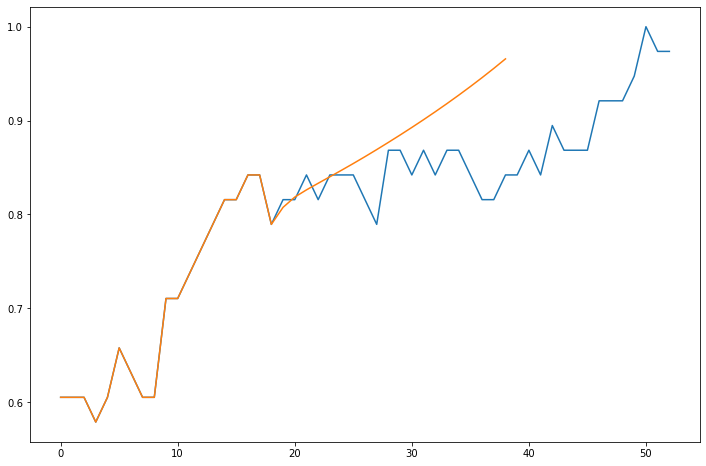

num 0 [1.00523464] actual 0.8157894736842097 prediction [0.8075888752937317]
num 1 [0.33441128] actual 0.8157894736842097 prediction [0.8185175657272339]
num 2 [1.8878147] actual 0.8421052631578938 prediction [0.8262078762054443]
num 3 [2.13880847] actual 0.8157894736842097 prediction [0.8332376480102539]
num 4 [0.23069419] actual 0.8421052631578938 prediction [0.8401625752449036]
num 5 [0.59911534] actual 0.8421052631578938 prediction [0.847150444984436]
num 6 [1.44479387] actual 0.8421052631578938 prediction [0.8542719483375549]
num 7 [5.61361851] actual 0.8157894736842097 prediction [0.8615847826004028]
num 8 [10.08555889] actual 0.7894736842105257 prediction [0.8690965175628662]
num 9 [0.96408671] actual 0.8684210526315788 prediction [0.876793384552002]
num 10 [1.86780547] actual 0.8684210526315788 prediction [0.8846414685249329]
num 11 [6.00618757] actual 0.8421052631578938 prediction [0.8926836848258972]
num 12 [3.74302756] actual 0.8684210526315788 prediction [0.9009262919425964

In [77]:
test_df = pd.read_csv('testset/J0003_0024_0221_20110307012732_cell_20.csv', encoding='utf8')

x_test2 = test_df['Resistance']

x_test2 = pd.DataFrame(x_test2)
x_test2.columns = scale_cols
x_test2 = scaler.fit_transform(x_test2)
x_test2 = pd.DataFrame(x_test2)

ds_test2 = make_dataset(x_test2, window_size)


x_test = ds_test2[:,:window_size,:]
y_test = ds_test2[:, window_size,:]

seq_in = x_test[180,:,:]
seq_in = seq_in.tolist()
seq_out = x_test[180,:,:].tolist()


for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1,window_size,1))
    pred_out = model.predict(sample_in)
    seq_out.append(pred_out[0].tolist())
    seq_in.append(pred_out[0].tolist())
    seq_in.pop(0)


plt.figure(figsize=(12,8))
plt.plot(x_test[180:,0,:])
plt.plot(seq_out)
plt.show()

error1 = error_rate(x_test[180:], seq_out, 20, 20)
print(error1)

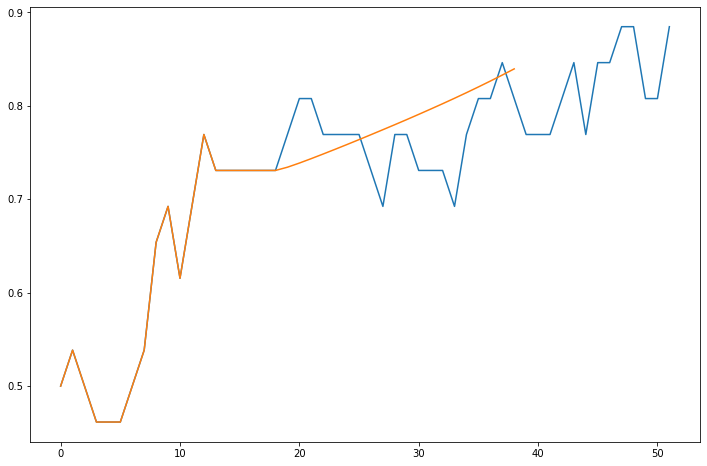

num 0 [4.55004811] actual 0.76923076923077 prediction [0.7342303991317749]
num 1 [8.54703699] actual 0.8076923076923084 prediction [0.7386585474014282]
num 2 [7.95488868] actual 0.8076923076923084 prediction [0.7434412837028503]
num 3 [2.71017313] actual 0.76923076923077 prediction [0.7483832836151123]
num 4 [2.05442429] actual 0.76923076923077 prediction [0.7534275054931641]
num 5 [1.3880676] actual 0.76923076923077 prediction [0.7585533261299133]
num 6 [0.71087837] actual 0.76923076923077 prediction [0.7637624740600586]
num 7 [5.23801352] actual 0.7307692307692317 prediction [0.7690470218658447]
num 8 [11.8554612] actual 0.6923076923076916 prediction [0.7743839621543884]
num 9 [1.36872292] actual 0.76923076923077 prediction [0.779759407043457]
num 10 [2.07823157] actual 0.76923076923077 prediction [0.7852171659469604]
num 11 [8.2133061] actual 0.7307692307692317 prediction [0.7907895445823669]
num 12 [8.98605397] actual 0.7307692307692317 prediction [0.7964365482330322]
num 13 [9.769

In [78]:
test_df = pd.read_csv('testset/J0003_0024_0221_20110307012732_cell_22.csv', encoding='utf8')

x_test2 = test_df['Resistance']

x_test2 = pd.DataFrame(x_test2)
x_test2.columns = scale_cols
x_test2 = scaler.fit_transform(x_test2)
x_test2 = pd.DataFrame(x_test2)

ds_test2 = make_dataset(x_test2, window_size)


x_test = ds_test2[:,:window_size,:]
y_test = ds_test2[:, window_size,:]

seq_in = x_test[180,:,:]
seq_in = seq_in.tolist()
seq_out = x_test[180,:,:].tolist()


for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1,window_size,1))
    pred_out = model.predict(sample_in)
    seq_out.append(pred_out[0].tolist())
    seq_in.append(pred_out[0].tolist())
    seq_in.pop(0)


plt.figure(figsize=(12,8))
plt.plot(x_test[180:,0,:])
plt.plot(seq_out)
plt.show()

error1 = error_rate(x_test[180:], seq_out, 20, 20)
print(error1)

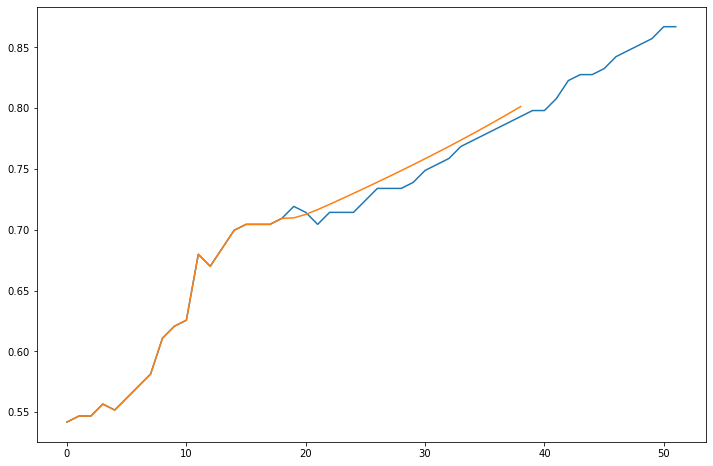

num 0 [1.31477877] actual 0.7192118226600983 prediction [0.7097557783126831]
num 1 [0.23416519] actual 0.714285714285714 prediction [0.7126131057739258]
num 2 [1.72332538] actual 0.7044334975369457 prediction [0.716573178768158]
num 3 [0.9255743] actual 0.714285714285714 prediction [0.7208969593048096]
num 4 [1.55027986] actual 0.714285714285714 prediction [0.7253591418266296]
num 5 [2.18535781] actual 0.714285714285714 prediction [0.7298954129219055]
num 6 [1.42931314] actual 0.7241379310344827 prediction [0.7344881296157837]
num 7 [0.70166124] actual 0.7339901477832509 prediction [0.7391402721405029]
num 8 [1.34371907] actual 0.7339901477832509 prediction [0.7438529133796692]
num 9 [1.99509127] actual 0.7339901477832509 prediction [0.7486339211463928]
num 10 [1.97243849] actual 0.7389162561576352 prediction [0.7534909248352051]
num 11 [1.29021147] actual 0.7487684729064039 prediction [0.7584291696548462]
num 12 [1.2927129] actual 0.7536945812807878 prediction [0.7634376883506775]
num

In [79]:
test_df = pd.read_csv('testset/J0003_0024_0221_20110307012732_cell_23.csv', encoding='utf8')

x_test2 = test_df['Resistance']

x_test2 = pd.DataFrame(x_test2)
x_test2.columns = scale_cols
x_test2 = scaler.fit_transform(x_test2)
x_test2 = pd.DataFrame(x_test2)

ds_test2 = make_dataset(x_test2, window_size)


x_test = ds_test2[:,:window_size,:]
y_test = ds_test2[:, window_size,:]

seq_in = x_test[180,:,:]
seq_in = seq_in.tolist()
seq_out = x_test[180,:,:].tolist()


for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1,window_size,1))
    pred_out = model.predict(sample_in)
    seq_out.append(pred_out[0].tolist())
    seq_in.append(pred_out[0].tolist())
    seq_in.pop(0)


plt.figure(figsize=(12,8))
plt.plot(x_test[180:,0,:])
plt.plot(seq_out)
plt.show()

error1 = error_rate(x_test[180:], seq_out, 20, 20)
print(error1)